# Đồ Án Cuối Kỳ

## Môi trường code

In [1]:
import sys
sys.executable

'/home/nson/anaconda3/bin/python'

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import numpy as np
import re
import operator

## Thu thập dữ liệu

Trong bài này, tụi em sẽ dùng dữ liệu đã được thu thập sẵn là file "data.csv" đính kèm; đây là dữ liệu về sản phẩm được bán ở website Amazon . Dữ liệu này được lấy trên Kaggle [ở đây](https://www.kaggle.com/promptcloud/product-listing-from-amazon-india?fbclid=IwAR35mYSniLTkn1ZedNxc_m9UNbuIksUAjAfpTRp9ystlxaZZVOMZIkFNKiI).

## Khám phá dữ liệu

## Đọc dữ liệu từ file csv

In [3]:
product_df = pd.read_csv('data.csv')
product_df.head()

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Site Name,Offers,Combo Offers,Stock Availibility,Product Asin,Image Urls
0,eb49cc038190f6f03c272f79fbbce894,2019-10-30 11:38:11 +0000,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,NaN,2000.00,799.00,Amazon In,60.05%,NaN,YES,B072BGHNJ1,https://images-na.ssl-images-amazon.com/images...
1,1657cc30c438affede6a5060d6847363,2019-10-31 15:46:54 +0000,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,NaN,2040.00,2040.00,Amazon In,0%,NaN,YES,B07QDTZYSJ,https://images-na.ssl-images-amazon.com/images...
2,41654633cce38c8650690f6dbac01fd3,2019-10-30 09:53:23 +0000,Skin Care,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",Generic,NaN,1824.00,1042.00,Amazon In,42.87%,NaN,YES,B07DCSN8MP,https://images-na.ssl-images-amazon.com/images...
3,08b1bd85c3efc2d7aa556fd79b073382,2019-10-29 16:16:52 +0000,Skin Care,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,Generic,NaN,2185.00,1399.00,Amazon In,35.97%,NaN,YES,B07GLW9VQN,https://images-na.ssl-images-amazon.com/images...
4,3ac3f213732512d1d11bb73ab3b1900f,2019-10-31 09:32:06 +0000,Grocery & Gourmet Foods,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in India,Harveys,NaN,594.00,570.00,Amazon In,4.04%,NaN,YES,B07NFYYLF1,https://images-na.ssl-images-amazon.com/images...


### Dữ liệu có bao nhiêu dòng và cột?

In [4]:
num_rows = len(product_df)
num_cols = len(product_df.columns)
num_rows, num_cols

(30000, 15)

### Ý nghĩa của mỗi dòng. Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả dữ liệu của sản phẩm từ Web bán hàng Amazon và theo quan sát sơ bộ về dữ liệu thì một dòng cho biết thông tin của một sản phẩm. Có vẻ không có dòng nào bị "lạc loài".

### Dữ liệu có các dòng bị lặp không?

Sẽ kiểm tra vụ này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược.

In [5]:
have_duplicated_rows = product_df.duplicated().any()
if have_duplicated_rows:
    print('Có trùng lặp')
else :
    print ('Không trùng lặp')



Không trùng lặp


### Ý nghĩa của mỗi cột

Dưới đây là phần mô tả dữ liệu từ từ Web bán hàng Amazon về các cột trong file "data.csv":
- **Uniq Id**: a unique identifier for each product.
- **Crawl Timestamp**: Data collection time for this product.
- **Category**: Product category.
- **Product Title**: where you list your product in an eCommerce store.
- **Product Description**: Detailed description of the product
- **Brand**: The brand that owns the Product.
- **Pack Size Or Quantity**: Size and quantity of products available.
- **Mrp**: Product prices according to the plans of the brands.
- **Price**: Product prices after promotions of brands.
- **Site Name**: the name of the website that is selling the product.
- **Offers**: Percentage on offer
- **Combo Offers**: Combo packages.
- **Stock Availibility**: The product is available or not (if the product is available, it is YES, if it is not, it is NO) .
- **Product Asin**: ASIN (Amazon Standard Identification Number) is one of the unique product identifiers used for managing the Amazon product catalog. In a technical sense, it's a 10-digit code made up of numbers and letters.
- **Image Urls**: Link to the product's profile picture.

### Mỗi cột có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Lấy `dtype` (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong `product_df` và lưu kết quả vào series `col_dtypes`; series này có index là tên cột. 


In [6]:
col_dtypes = product_df.dtypes
col_dtypes

Uniq Id                  object
Crawl Timestamp          object
Category                 object
Product Title            object
Product Description      object
Brand                    object
Pack Size Or Quantity    object
Mrp                      object
Price                    object
Site Name                object
Offers                   object
Combo Offers             object
Stock Availibility       object
Product Asin             object
Image Urls               object
dtype: object

### Cột có dtype là object nghĩa là sao?

`product_df` có 11 cột có `dtype` là `object`: "Uniq Id", "Crawl Timestamp", "Category", "Product Title", "Brand", "Site Name", "Combo Offers", "Stock Availibility", "Product Asin", "Product Description", "Image Urls". Trong Pandas, kiểu dữ liệu `object` thường ám chỉ chuỗi, nhưng thật ra kiểu dữ liệu `object` có thể chứa một đối tượng bất kỳ trong Python (vì thật ra ở bên dưới kiểu dữ liệu `object` chứa địa chỉ). Nếu một cột trong dataframe có `dtype` là `object` thì có thể các phần tử trong cột này sẽ có kiểu dữ liệu khác nhau; để biết được kiểu dữ liệu thật sự của các phần tử trong cột này thì ta phải truy xuất vào từng phần tử và dùng câu lệnh `type` để xem kiểu dữ liệu, ví dụ `type(s.iloc[i])` với `s` là một cột.

Công việc là viết hàm nhận đầu vào là một cột `s` (series) có `dtype` là `object` và trả về tập các kiểu dữ liệu thật sự có trong cột này. Trong hàm này, bạn có thể dùng phương thức `apply` của series.

Ta cần biết tập các kiểu dữ liệu thật sự có trong mỗi cột để dễ dàng tiền xử lý

In [7]:
def object_type(value):
    return type(value)
def open_object_dtype(s):
    dtypes = set(s.apply(object_type))    
    return dtypes

print('Uniq Id',open_object_dtype(product_df['Uniq Id']))
print('Crawl Timestamp',open_object_dtype(product_df['Crawl Timestamp']))
print('Category',open_object_dtype(product_df['Category']))
print('Product Title',open_object_dtype(product_df['Product Title']))
print('Product Description',open_object_dtype(product_df['Product Description']))
print('Brand',open_object_dtype(product_df['Brand']))
print('Pack Size Or Quantity',open_object_dtype(product_df['Pack Size Or Quantity']))
print('Mrp',open_object_dtype(product_df['Mrp']))
print('Price',open_object_dtype(product_df['Price']))
print('Site Name',open_object_dtype(product_df['Site Name']))
print('Offers',open_object_dtype(product_df['Offers']))
print('Combo Offers',open_object_dtype(product_df['Combo Offers']))
print('Stock Availibility',open_object_dtype(product_df['Stock Availibility']))
print('Product Asin',open_object_dtype(product_df['Product Asin']))
print('Image Urls',open_object_dtype(product_df['Image Urls']))

Uniq Id {<class 'str'>}
Crawl Timestamp {<class 'str'>}
Category {<class 'str'>}
Product Title {<class 'str'>}
Product Description {<class 'str'>, <class 'float'>}
Brand {<class 'str'>, <class 'float'>}
Pack Size Or Quantity {<class 'str'>, <class 'float'>}
Mrp {<class 'str'>, <class 'float'>}
Price {<class 'str'>, <class 'float'>}
Site Name {<class 'str'>}
Offers {<class 'str'>, <class 'float'>}
Combo Offers {<class 'str'>, <class 'float'>}
Stock Availibility {<class 'str'>}
Product Asin {<class 'str'>}
Image Urls {<class 'str'>}


## Tiền xử lý (nếu cần)

Ta sẽ tiền xử lý các cột `Crawl Timestamp`,`Mrp`, `Price`, `Offers` , `Pack Size Or Quantity`

### Chuyển dtype của cột "Crawl Timestamp" sang datetime


In [8]:
product_df['Crawl Timestamp'] = pd.to_datetime(product_df['Crawl Timestamp'],format = "%Y-%m-%d %H:%M:%S")
product_df['Crawl Timestamp']

0       2019-10-30 11:38:11+00:00
1       2019-10-31 15:46:54+00:00
2       2019-10-30 09:53:23+00:00
3       2019-10-29 16:16:52+00:00
4       2019-10-31 09:32:06+00:00
                   ...           
29995   2019-10-31 06:29:39+00:00
29996   2019-10-30 04:10:36+00:00
29997   2019-10-30 22:54:39+00:00
29998   2019-10-31 08:20:12+00:00
29999   2019-10-30 07:54:05+00:00
Name: Crawl Timestamp, Length: 30000, dtype: datetime64[ns, UTC]

### Chuyển dtype của cột "Offers" sang float

Cột Offers có dtype gồm 2 loại là str và float. float là ứng với NaN, còn str thì ứng với các giá trị %. Vì vậy ta thực hiện ép kiểu cho NaN từ float sang str, sau đó ta thực hiện cắt bỏ ký tự % phía sau mỗi chuỗi, ép kiểu về float và chia cho 100

In [9]:
product_df["Offers"] = product_df["Offers"].str.replace('%','').astype(float) / 100

### Chuyển dtype của cột "Mrp" và "Price" sang float

- Cột Mrp có dtype gồm 2 loại là str và float. float là ứng với NaN, còn str thì ứng với chuỗi (dạng số)

- Kiểm tra cột Mrp có giá trị có dấu . ở đầu chuỗi ví dụ .250.00, điều này gây khó khăn trong việc ép kiểu dữ liệu từ str sang float. Để xử lý điều này, ta sẽ sử dụng hàm lstrip

- Xử lý xong ta cũng chưa thể chuyển kiểu dữ liệu ngay được vì trong các cột này có giá trị là " " (chuỗi có một khoảng trắng). Vậy thì trước khi chuyển, ta sẽ replace các giá trị " " bằng NaN.

- Cột Price cũng giống như cột Mrp nên ta xử lý tương tự

In [10]:
product_df["Mrp"] = product_df["Mrp"].str.lstrip('.')
product_df['Mrp'] = product_df['Mrp'].replace(r'^\s*$', np.nan, regex=True)
product_df['Mrp'] = product_df['Mrp'].astype(float)

product_df["Price"] =  product_df["Price"].str.lstrip('.')
product_df['Price'] = product_df['Price'].replace(r'^\s*$', np.nan, regex=True)
product_df['Price']  = product_df['Price'].astype(float)

### Chuyển dtype của cột "Pack Size Or Quantity" sang float

In [11]:
def change_unit(x):
    if(type(x) == str):
        try:
            num = float(re.findall('\d+', x)[0])
        except:
            return np.nan
        if('K' in x):
            num = num * 1000
        return num

product_df['Pack Size Or Quantity'] = product_df['Pack Size Or Quantity'].replace(r'^\s*$', np.nan, regex=True)
product_df['Pack Size Or Quantity'] = product_df['Pack Size Or Quantity'].apply(change_unit)

product_df['Pack Size Or Quantity']


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
29995   NaN
29996   NaN
29997   NaN
29998   NaN
29999   NaN
Name: Pack Size Or Quantity, Length: 30000, dtype: float64

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột numeric, các giá trị được phân phối như thế nào?

Ta có 6 cột numeric: Crawl Timestamp,Pack Size Or Quantity,Mrp, Price, Offers,Combo Offers

Với mỗi cột numeric bạn sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Bạn lưu kết quả vào dataframe nume_col_profiles_df. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có 6 cột là Crawl Timestamp,Pack Size Or Quantity,Mrp, Price, Offers,Combo Offers

In [12]:
nume_col_df = product_df[["Crawl Timestamp","Pack Size Or Quantity",\
                          "Mrp", "Price", "Offers"]]
percent_missing = nume_col_df.isnull().sum() * 100 / len(nume_col_df)

data = [list(percent_missing),list(nume_col_df.min()),list(nume_col_df.max())]

nume_col_profiles_df = pd.DataFrame(data,columns = nume_col_df.columns\
                                    ,index =["missing_ratio", "min", "max"])
nume_col_profiles_df

,Crawl Timestamp,Pack Size Or Quantity,Mrp,Price,Offers
missing_ratio,0,65.926667,2.33,2.0,1.553333
min,2019-10-28 14:30:19+00:00,4.000000,12.00,12.0,0.000000
max,2019-10-31 19:13:19+00:00,650000.000000,80000.00,21990.0,0.972400


### Nhận xét về "missing_ratio", "min", "max" của các cột numeric

Không có gì bất thường.

### Với mỗi cột categorical, các giá trị được phân phối như thế nào?

Ta có 11 cột categorical: 'Uniq Id','Product Title', 'Product Description', 'Brand', 'Pack Size Or Quantity', 'Mrp', 'Price', 'Site Name', 'Offers', 'Combo Offers', 'Stock Availibility', 'Product Asin', 'Image Urls'

Với mỗi cột categorical, bạn tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Bạn lưu kết quả vào dataframe cate_col_profiles_df. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có 11 cột là (11 là số lượng cột categorical)

In [13]:
cate_col_df = product_df[['Uniq Id','Category', 'Product Title',
       'Product Description', 'Brand','Site Name', 'Combo Offers', 'Stock Availibility',
       'Product Asin', 'Image Urls']]
percent_missing = cate_col_df.isnull().sum() * 100 / len(cate_col_df)
data = [list(percent_missing),
        list(cate_col_df.nunique(axis=0)),
       [cate_col_df["Uniq Id"].dropna().unique(),
        cate_col_df["Category"].dropna().unique(),
        cate_col_df["Product Title"].dropna().unique(),
        cate_col_df["Product Description"].dropna().unique(),
       cate_col_df["Brand"].dropna().unique(),
       cate_col_df["Site Name"].dropna().unique(),
       cate_col_df["Combo Offers"].dropna().unique(),
       cate_col_df["Stock Availibility"].dropna().unique(),
       cate_col_df["Product Asin"].dropna().unique(),
       cate_col_df["Image Urls"].dropna().unique()]]


cate_col_profiles_df = pd.DataFrame(data,
                                    columns = cate_col_df.columns,
                                    index = ["missing_ratio", "num_diff_vals", "diff_vals"])
cate_col_profiles_df

,Uniq Id,Category,Product Title,Product Description,Brand,Site Name,Combo Offers,Stock Availibility,Product Asin,Image Urls
missing_ratio,0,0,0,6.63333,0.29,0,99.8767,0,0,0
num_diff_vals,30000,6,29630,22584,8454,1,36,2,30000,29578
diff_vals,"[eb49cc038190f6f03c272f79fbbce894, 1657cc30c43...","[Skin Care, Grocery & Gourmet Foods, Bath & Sh...",[ Lee posh Lactic Acid 60% Anti ageing Pigment...,[PROFESSIONAL GRADE Face Peel: this peel stimu...,"[Lee Posh, SLB Works, Generic, Harveys, ShiKai...",[Amazon In],[ Myoc Neem Face Wash: Buy 2 Neem face Wash 10...,"[YES, NO]","[B072BGHNJ1, B07QDTZYSJ, B07DCSN8MP, B07GLW9VQ...",[https://images-na.ssl-images-amazon.com/image...


### Nhận xét về "missing_ratio", "num_diff_vals", "diff_vals" của các cột categorical

## Đưa ra câu hỏi có ý nghĩa cần trả lời

Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:
- câu hỏi của thành viên 1 - Nguyễn Sơn - 19127539
    - Số lượng các sản phẩm thay đổi như thế nào theo thể loại ?
        - ý nghĩa của câu này đại khái muốn khai thác thông tin về thị trường mà web amazon này nhắm đến . thông qua các con số về số lượng sản phẩm trên từng loại sản phẩm.
    - Với các sản phẩm ở mỗi Category, tỉ lệ có hàng tồn kho hay không tính đến thời điểm dữ liệu được thu thập là bao nhiêu?
        - ý nghĩa của câu này là cho ta thấy rõ hơn về tỉ lệ có thể  cung cấp các sản phẩm của các thể loại.
        - cũng có cả line để ta quan sát và so sánh được giữa các thể loại với nhau
    - Thể loại nào được giảm giá nhìu nhất ở Amazon cho đến lúc thu nhập dữ liệu này? 
        - Muốn có thể được khách hàng quan tâm hơn thì điều không thể thiếu đó là giảm giá và câu hỏi trên đây sẽ cho ta thấy rõ hơn về sự quan tâm khách hàng của các Category nào đối với khách hàng là tốt nhất.
        - và điều đó cũng một phần nào đó hiểu được rõ hơn về sự quan tâm của Web Amazon đối với khách hàng thông qua thị trường chính họ đang cạnh tranh với các Web bán hàng khác


## Tiền xử lý

### Thêm cột "price is reduced" vào dataframe (0.5đ)

Trong các câu hỏi ở trên, có câu cần đến thông tin về giá được giảm giá của mỗi sản phẩm. Do đó, trước khi phân tích để trả lời cho các câu hỏi, phải tiền xử lý bằng cách thêm cột "price is reduced" (giá được giảm trong sản phẩm) vào product_df. Sau khi thêm thì product_df phải thay đổi.

In [14]:
series = product_df['Mrp'] *   product_df['Offers']
series.name = "price is reduced"

product_df = pd.concat([product_df,series],axis=1)

## Phần tích dữ liệu để trả lời các câu hỏi

###  Thể loài nào được giảm giá nhìu nhất ở Amazon cho đến lúc thu nhập dữ liệu này?`

- Thể Loại ở đây được lưu trong cột "Category". lưu kết quả vào dict `top1_discount` theo thứ tự phần tử đầu tiên là có nhiều discount nhất, phần tử thứ hai là có nhiều discount nhì, ...

In [15]:
top1 = product_df.groupby(['Category','price is reduced']).size()
dict_price_reduced_cat = {}

for i in pd.Series.unique(product_df['Category']):
    all_price_reduce_cat = top1[i].values * top1[i].index
    sum_price_reduce_cat = pd.Series(all_price_reduce_cat).sum()
    dict_price_reduced_cat[i] = sum_price_reduce_cat
    
sorted_dict_price_reduced_cat = sorted(dict_price_reduced_cat.items(), key=operator.itemgetter(0) , reverse =True)

top1_reduced = sorted_dict_price_reduced_cat[0]
top1_reduced

('Skin Care', 10400674.049084002)

### Số lượng các sản phẩm thay đổi như thế nào theo thể loại ?

- Bước 1: Tính số lượng sản phẩm của mỗi thể loại. lưu kết quả vào series `num_products_each_category`, trong đó index là thể loại.
- Bước 2: Từ kết quả ở trên, bạn vẽ đồ thị dạng line, trong đó trục hoành là thể loại và trục tung là số lượng sản phẩm. Dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Đặt tên trục hoành là "Category" và tên trục tung là "NumProducts".

Bước 1

In [16]:
num_products_each_category = pd.Series(product_df['Category'].value_counts(),index = pd.Series.unique(product_df['Category']))

Bước 2

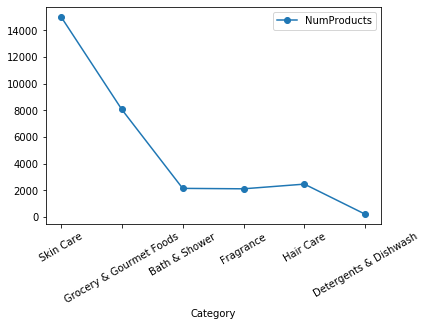

In [17]:
df = pd.DataFrame({'Category': num_products_each_category.index,
                   'NumProducts': np.array(num_products_each_category.values)})

df.plot.line(x='Category', y='NumProducts', marker='o' ,rot = 30 )

### Với các sản phẩm ở mỗi Category, tỉ lệ có hàng tồn kho hay không tính đến thời điểm dữ liệu được thu thập là bao nhiêu?

- Bước 1: Tính tỉ lệ (từ 0 đến 1) có hàng để cung cấp của mỗi thể loại (thể loại ở đây là thể loại trên web Amazon có thể cung cấp, còn cung được hay không cung được là tính tới thời điểm dữ liệu được thu thập)
- Bạn lưu kết quả vào series`stock_availibility_ratio_each_category`, trong đó index là thể loại.
- Bước 2: Từ kết quả ở trên, bạn vẽ đồ thị dạng line, trong đó trục hoành là thể loại và trục tung là tỉ lệ cung cấp được. Dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Đặt tên trục hoành là "Category" và tên trục tung là "StockAvailibilityRatio". Ngoài ra, bạn cũng cần chỉnh miền giá trị của trục tung là từ 0 đến 1.

Bước 1

In [18]:
# YOUR CODE HERE
gb_stock_availibility_category = product_df.groupby(['Category','Stock Availibility']).size()


gb_stock_availibility_category.name = "Total"

df_stock_availibility_category = gb_stock_availibility_category.to_frame()


stock_availibility_ratio_each_category = df_stock_availibility_category.groupby(level=0).apply(lambda x:
                                                 x / float(x.sum()))

stock_availibility_ratio_each_category = stock_availibility_ratio_each_category.reset_index()

stock_availibility_ratio_each_category = stock_availibility_ratio_each_category\
[stock_availibility_ratio_each_category['Stock Availibility']=="YES"]

stock_availibility_ratio_each_category = stock_availibility_ratio_each_category.set_index('Category')

stock_availibility_ratio_each_category = stock_availibility_ratio_each_category['Total']

Bước 2

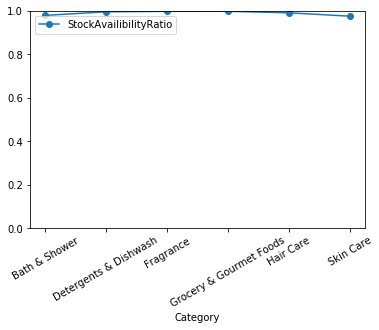

In [19]:
df = pd.DataFrame({'Category': stock_availibility_ratio_each_category.index,
                   'StockAvailibilityRatio': stock_availibility_ratio_each_category.values})

df.plot.line(x='Category', y='StockAvailibilityRatio', marker='o' , ylim = (0,1) ,rot =30)


## Tiền xử lý (nếu cần) + phân tích dữ liệu để trả lời cho câu hỏi 2